# Homework #8 --The Last One-- (100 pts)
**Due:** Thursday March 8th, 11:59PM via Blackboard.  

**Name:** *name here*,  **Student Id:** *Your ID here*

In this homework we will review a bit about traffic engineering, and start learning about delays (queues) in networks and how to simulate them.

In [5]:
# The following enables embedded ploting via matplot lib.
%matplotlib notebook
import matplotlib.pyplot as plt
from SimComponents import PacketGenerator, PacketSink, FlowDemux, ShaperTokenBucket, TrTCM
import simpy

## Problem 1. Simulation General (20 pts)

**(a)** Give four place where we might want to use random numbers (random variables with a particular distribution) in our network simulations?

**(b)** What is the difference between network *emulation* (like what is done in Mininet) and the network *simulations* we are now doing?

**(c)** How could you make our simulations more useful to model *Differentiated Services* in an IP network? How might you change the *Packet* class in the `SimComponents.py` file?

**(d)** List two ways to try and verify if a simulation you have run reflects reality?




## Problem 2. Traffic Shaping
Note in this problem and many of our traffic shapping examples we use constant sized packets. This is only to make the results easy to interpret on a plot of arrival times and is **not** required for correct operation of a traffic shaper or policer.  See the `ShaperExample2.py` file included with the homework for setup and plotting.

**(a)** Create a source that sends 200 byte packets in the following way. Three packets in a consecutively  with 2 usec spacing followed by two packets with 5 usec spacing.  Show a line plot of the packet sending times showing two to three repetitions of this sending pattern.

**(b)** What is the average rate in bits per second for this source?

**(c)** Compare (plot) the output times of the packets from the source you created about to that same source run through a Token Bucket traffic shaper with a bucket size of 300 bytes and a rate equal to what you calculated in part (b).



## Problem 3. Scheduling and Fairness

**(a)** In the figure shown below show the ordering of the packets as they leave the system assuming (i)priority scheduling (with #1 having the highest priority), and (ii) Round Robin scheduling.
![Packet Scheduling](schedule.png)

**(b)** In *Stochastic Fair Queueing* what header fields can we hash on and which shouldn't we hash on to avoid packet reordering problems with TCP connections?

**(c)** How does Linux's implementation of [SFQ](http://manpages.ubuntu.com/manpages/artful/man8/tc-sfq.8.html) prevent an unlucky users getting stuck in the same hash based queue forever?


## Problem 4. Policing, Metering and Marking

For a Two rate three color marker (policer) with a Peak Information Rate (PIR) of 6Gbps, a Peak Burst Size (PBS) of 3000 bytes, a Committed Information Rate (CIR) of 3Gbps, and a Committed Burst Size (CBS) of 4000 bytes answer the following questions. You may want to use the code below in this notebook.

**(a)** If the source has a constant packet size of 1500 bytes, what is the range of interarrival times that will guarantee that all packets will be marked Green? Demonstrate this with the shortest permitted time.

**(b)** If the source has a constant packet size of 1500 bytes, what is the range of interarrival times that will guarantee that all packets will be marked Green and Yellow but no Red? Demonstrate this with the mid point of the time range.

**(c)** Above what rate (below what interarrival time) will some packets be marked red? Demonstrate this with a value twice the rate (half the time).


<IPython.core.display.Javascript object>


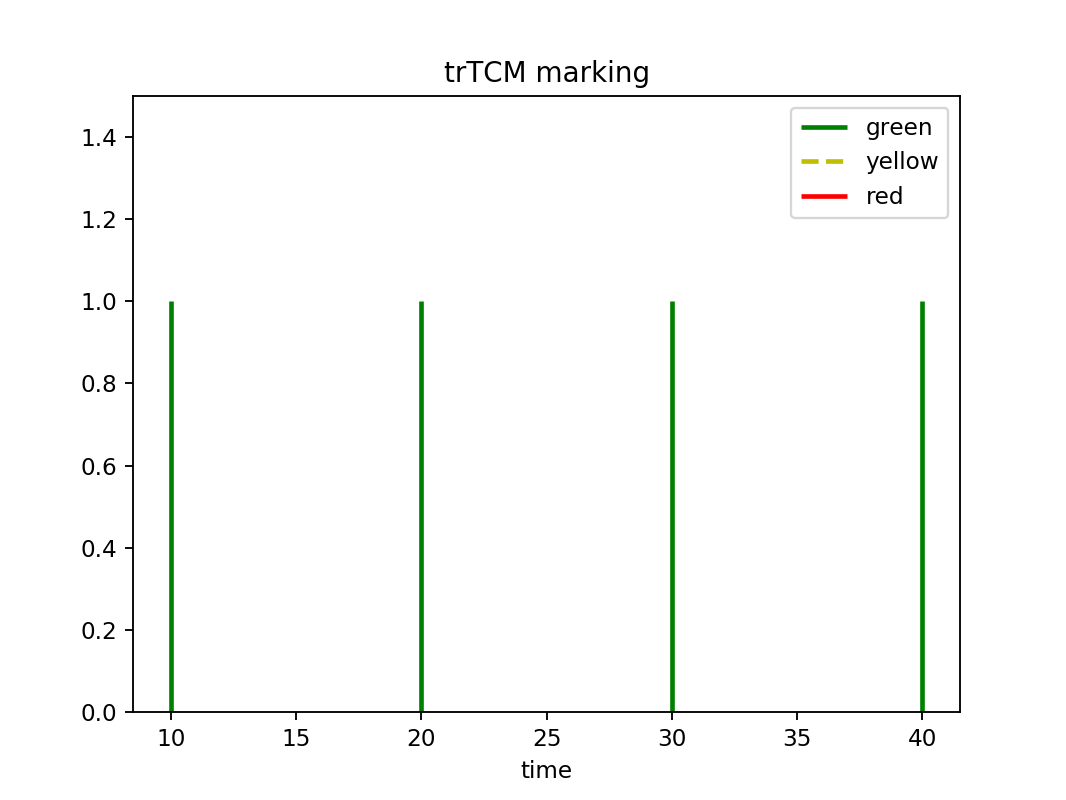

In [10]:
def const_arrival():
    return 10.0  # Change value here

def const_size():
    return 1500.0

pir = 6000.0  # 6Gbps
pbs = 3000  # bytes
cir = 3000.0  # 3Gbps
cbs = 4000  # bytes

env = simpy.Environment()
pg = PacketGenerator(env, "SJSU", const_arrival, const_size)
ps_green = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
ps_yellow = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
ps_red = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
marker = TrTCM(env, pir, pbs, cir, cbs)
demux = FlowDemux([ps_green, ps_yellow, ps_red])
pg.out = marker
marker.out = demux
env.run(until=50)

fig, ax1 = plt.subplots()
ax1.vlines(ps_green.arrivals, 0.0, 1.0, colors="g", linewidth=2.0, label='green')
ax1.vlines(ps_yellow.arrivals, 0.0, 0.8, colors="y", linewidth=2.0, linestyles='--', label='yellow')
ax1.vlines(ps_red.arrivals, 0.0, 0.6, colors="r", linewidth=2.0, label='red')
ax1.set_title("trTCM marking")
ax1.set_xlabel("time")
ax1.set_ylim([0, 1.5])
ax1.legend()
plt.show()

## Problem 5. The Differentiated Services Model for IP

**(a)** In the Differentiated services model who is responsible (network or endpoint) for traffic shaping?

**(b)** In the Differentiated services model who is responsible for traffic policing (network or endpoint)? Where does policing need to be done (everywhere?, selected points?) Explain.

**(c)** Suppose your network switches only supported simple three level priority packet scheduling along with the ability to limit buffer sizes for each priority level. Explain, qualitatively, how you would allocate priorities and buffer limits to the following three traffic types (i) Voice over IP, (ii) video streaming services, and (iii) file transfer services (including large files).

